In [30]:
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm
import matplotlib.pyplot as plt

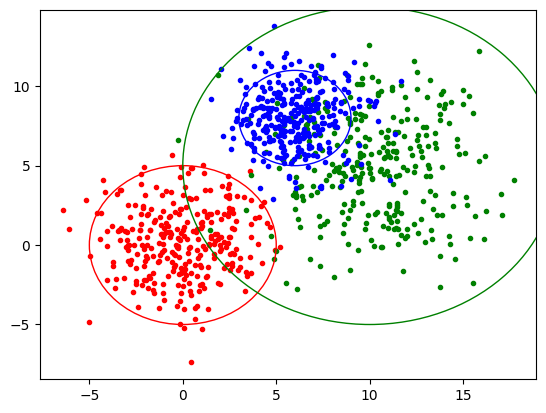

In [26]:
# Generate data from a bivariate gaussian distribution

# Mean vector
original_mu_list = [np.array([0, 0]), np.array([10, 5]), np.array([6, 8])]
# Covariance matrix
original_sigma_list = [np.array([[5, 0], [0, 5]]), np.array([[10, 0], [0, 10]]), np.array([[3, 0], [0, 3]])]
# Number of samples
n = 300

all_samples = []

for mu, sigma in zip(original_mu_list, original_sigma_list):
    # Generate samples
    X = np.random.multivariate_normal(mu, sigma, n)
    all_samples.append(X)
    
colors = ['r', 'g', 'b']
markers = ['.', '.', '.']

# Plot the samples
for i in range(len(all_samples)):
    plt.scatter(all_samples[i][:, 0], all_samples[i][:, 1], color=colors[i], marker=markers[i])
for i in range(len(original_mu_list)):
    circle = plt.Circle((original_mu_list[i][0], original_mu_list[i][1]), (original_sigma_list[i][0, 0]), color=colors[i], fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()


In [41]:
k = 3
# Build the input to the EM algorithm
X = np.concatenate(all_samples, axis=0)
n = X.shape[0] # Number of data points
d = X.shape[1] # Dimension of the data points

# Initialize the parameters
mu = np.random.rand(k, 2)
# Estimate the initial covariance matrices using the covariance of the data because otherwise scipy cannot sample from it as the cov matrix is not positive definite
sigma = [np.cov(X.T) for _ in range(k)]
pi = np.random.rand(k)
# Normalize pi
pi = pi / np.sum(pi)

num_iter = 30

# Run the EM algorithm
for i in tqdm(range(num_iter), desc='EM iteration'):
    # E-step
    # Compute the responsibilities using the previous mu, sigma and pi
    r  = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            # Compute the pdf for the ith data point and the jth gaussian
            distribution = multivariate_normal(mu[j], sigma[j], allow_singular=True)
            r[i, j] = pi[j] * distribution.pdf(X[i])
    r = r / np.sum(r, axis=1, keepdims=True)    
    
    # M-step
    # Compute the new parameters
    for j in range(k):
        N_j = np.sum(r[:, j]) # Sum of the responsibilities for the jth gaussian
        mu[j] = np.sum(r[:, j].reshape(-1, 1) * X, axis=0) / N_j
        sigma[j] = (1 / N_j) * np.sum(r[:, j].reshape(-1, 1, 1) * np.matmul((X - mu[j]).reshape(-1, 2, 1), (X - mu[j]).reshape(-1, 1, 2)), axis=0)
        pi[j] = N_j / n



EM iteration:   0%|          | 0/30 [00:00<?, ?it/s]


ValueError: setting an array element with a sequence.

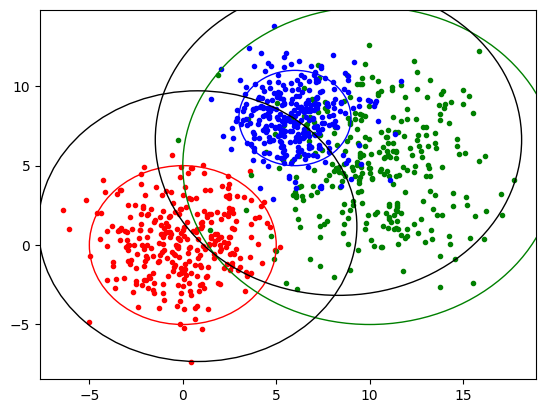

In [40]:
# Plot the results
colors = ['r', 'g', 'b']
markers = ['.', '.', '.']

# Plot the samples
for i in range(len(all_samples)):
    plt.scatter(all_samples[i][:, 0], all_samples[i][:, 1], color=colors[i], marker=markers[i])
for i in range(len(original_mu_list)):
    circle = plt.Circle((original_mu_list[i][0], original_mu_list[i][1]), (original_sigma_list[i][0, 0]), color=colors[i], fill=False)
    plt.gcf().gca().add_artist(circle)

# Plot the gaussians
for i in range(k):
    circle = plt.Circle((mu[i][0], mu[i][1]), (sigma[i][0, 0]), color='k', fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()
